In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import precision_recall_curve, f1_score, recall_score, precision_score, roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import confusion_matrix

from sklearn import neighbors
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import  StandardScaler

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.model_selection import cross_val_predict, cross_validate, cross_val_score, StratifiedKFold
from sklearn import metrics
from sklearn.preprocessing import OneHotEncoder, normalize
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks
from imblearn.combine import SMOTETomek

In [2]:

def roc_plot(Y_test, Y_pred, title=''):
    fpr, tpr, thresholds = metrics.roc_curve(Y_test, Y_pred)
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',lw=lw, label='ROC curve (area = %0.2f)' % metrics.auc(fpr, tpr))
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend(loc="lower right")
    plt.show()

def cross_10_fold(classifier, features, labels, smote_v, threshold):

    conf_matrixes = []

    print("Training Beginssssss!!!!!!!")

    for i, ( train, test ) in enumerate(StratifiedKFold(n_splits=5, shuffle=True, random_state=42).split(features, labels)):

        print ('')
        print (' -------------------- Fold : ', i, ' -------------------- ')

        features_train, features_test = features.iloc[train], features.iloc[test]
        labels_train, labels_test = labels.iloc[train], labels.iloc[test]
        print "Features Located"

        smote = SMOTE(random_state=42) #ratio=smote_v, random_state=42)
        features_oversampling, labels_oversampling = smote.fit_resample(features_train, labels_train)

        print "Smote Done"

        classifier = classifiers[classifier_choice-1]
        classifier.fit(features_oversampling, labels_oversampling)
        y_scores = classifier.predict_proba(features_test)[:, 1]
        labels_predicted = classifier.predict(features_test)

        conf_table = confusion_matrix(labels_test, labels_predicted)

        print "Fold " + str(i) + " Conf.Matrix"
        print conf_table

        conf_matrixes.append(conf_table)
        Y_tests.append(labels_test)
        Y_tests_preds.append(labels_predicted)
        Y_tests_preds_probabs.append(y_scores)


    # Confusion Matrices
    conf_matrix_final = []
    for i, each in enumerate(conf_matrixes):
        if i == 0:
            conf_matrix_final = each.copy()
        else:
            conf_matrix_final += each.copy()

    print '\n'
    print '\n'
    print (' - - - - - - Final Conf Matrix - - - - - - ')
    print (conf_matrix_final)

    Y_tests_final = []
    for i, each in enumerate(Y_tests):
        Y_tests_final.extend(each.tolist())

    Y_tests_preds_final = []
    for i, each in enumerate(Y_tests_preds):
        Y_tests_preds_final.extend(each.tolist())

    Y_tests_preds_proba_final = []
    for i, each in enumerate(Y_tests_preds_probabs):
        Y_tests_preds_proba_final.extend(each.tolist())

    print (' - F1 score    : ', round(metrics.f1_score(Y_tests_final, Y_tests_preds_final, pos_label=1), 3))
    print (' - Precision   : ', round(metrics.precision_score(Y_tests_final, Y_tests_preds_final, pos_label=1), 3))
    print (' - Recall      : ', round(metrics.recall_score(Y_tests_final, Y_tests_preds_final, pos_label=1), 3))
    roc_plot(Y_tests_final, Y_tests_preds_proba_final, "FIX TITLE")


/Users/navinLR/anaconda2/lib/python2.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
/Users/navinLR/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237036 entries, 0 to 237035
Columns: 288 entries, convertedAmount to accountcode_UKAccount
dtypes: float64(1), int64(1), uint8(286)
memory usage: 68.3 MB


/Users/navinLR/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:46: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


Shape of the training features: (237036, 288)
Training Beginssssss!!!!!!!

(' -------------------- Fold : ', 0, ' -------------------- ')
Features Located
Smote Done


/Users/navinLR/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Fold 0 Conf.Matrix
[[   65     4]
 [ 8093 39246]]

(' -------------------- Fold : ', 1, ' -------------------- ')
Features Located
Smote Done
Fold 1 Conf.Matrix
[[   60     9]
 [ 8211 39127]]

(' -------------------- Fold : ', 2, ' -------------------- ')
Features Located
Smote Done
Fold 2 Conf.Matrix
[[   63     6]
 [ 7770 39568]]

(' -------------------- Fold : ', 3, ' -------------------- ')
Features Located
Smote Done
Fold 3 Conf.Matrix
[[   61     8]
 [ 7938 39400]]

(' -------------------- Fold : ', 4, ' -------------------- ')
Features Located
Smote Done
Fold 4 Conf.Matrix
[[   61     8]
 [ 8352 38986]]




 - - - - - - Final Conf Matrix - - - - - - 
[[   310     35]
 [ 40364 196327]]
(' - F1 score    : ', 0.907)
(' - Precision   : ', 1.0)
(' - Recall      : ', 0.829)


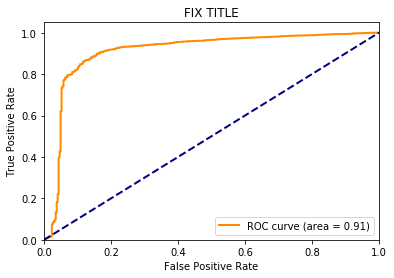

In [3]:
src = 'df_cleaned.csv'

ENCODE_FLAG = 0

classifiers_array = []
conf_matrixes = []
Y_tests = []
Y_tests_preds = []
Y_tests_preds_probabs = []

dataset = pd.read_csv(src)

dataFrameSubset = dataset[['issuercountrycode',
                           'txvariantcode',
                           'convertedAmount',
                           'currencycode',
                           'shoppercountrycode',
                           'shopperinteraction',
                           'cardverificationcodesupplied',
                           'cvcresponsecode',
                           'accountcode',
                           'simple_journal']]

#ad-hoc endoding of features
dataFrameSubset.loc[dataFrameSubset.simple_journal == 'Chargeback', 'simple_journal'] = 0
dataFrameSubset.loc[dataFrameSubset.simple_journal == 'Settled', 'simple_journal'] = 1
dataFrameSubset['simple_journal'] = dataFrameSubset['simple_journal'].astype('int')
labels = dataFrameSubset.simple_journal
features = dataFrameSubset.drop('simple_journal', axis=1)
features = pd.get_dummies(features)
features.info()

#Classifier choice
classifier_choice = 6
classifiers = [
    neighbors.KNeighborsClassifier(n_neighbors=5),          # ----> 1
    SVC(),                                                  # ----> 2
    DecisionTreeClassifier(),                               # ----> 3
    RandomForestClassifier(),                               # ----> 4
    AdaBoostClassifier(),                                   # ----> 5
    LogisticRegression(C=400, penalty='l1'),                # ----> 6
    # MLPClassifier(solver='adam', alpha=1e-2)                # ----> 7

    ]

features_array = features.as_matrix()
print "Shape of the training features: " + str(features_array.shape)

clf = classifiers[classifier_choice-1]
cross_10_fold(clf,features,labels,0.2,0.6)
